In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
# import statsmodels.graphics.gofplots as sm
import scipy
from scipy import stats

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In this tutorial we'll look at how to how to generate qq plots, how to calculate calculate cumulative areas under the curve for both the normal and t-distributions (as well as the inverse functions), and look at confidence intervals and one-sample hypothesis testing for means.   

# Q-Q plots
In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.

Technically, we are using a probability plot here to graphically estimate the quantiles of a dataset against a comparison distribution that is a standard normal distribution (this is the default for the sm.qqlot call). 

If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line y = x (the diagonal line). Comparing a dataset against the theoretical normal distribution, the points should follow an approximaely straight line with departures indicating departures from normality.  

# Testing for normally distributed data with Q-Q plots

In general we need to test that our data are normally distributed to confidently use parametric statistics for interval estimation and hypothesis testing. We learned that a good way to do that was via qq plots, where we will compare the distribution of the dataset of interest with a normal distribution.  

Let's simulate some normal data (mean=10, std=2) to represent the dataset that we are interested in and compare it aganst a theoretical normal distribution.  

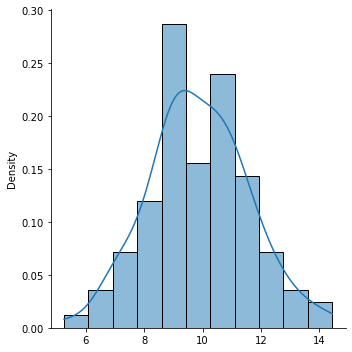

In [2]:
# simulated data
normal_random_variables=norm.rvs(10,2,size=100)
ax=sns.displot(normal_random_variables,kde=True,stat='density')

mean_sample=np.mean(normal_random_variables)
std_sample=np.std(normal_random_variables,ddof=1)

In [398]:
#print(normal_random_variables)

In [3]:
# We have taken a sample of 100 from a normal distribution of mean=10 and standard deviation=2
print(mean_sample)
print(std_sample)

9.857496326374857
1.6881208761848117


Let's plot this data on a qq plot. The method to plot the qq plots also takes `loc` and `scale` as the values. We'll use the ones calculated from our data set because in actuality we don't know the true population parameters. The additional parameter `line='45'` plots the y=x line on the same plot.

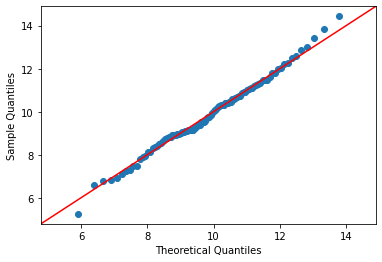

In [4]:
normal_random_variables.sort()
sm.qqplot(normal_random_variables,line='45',loc=mean_sample,scale=std_sample)
plt.show()

As expected the sample data and the theoretical data match up pretty well. They don't match up perfectly. You can add a 95% connfidence interval for the qq plot if you wanted to.

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

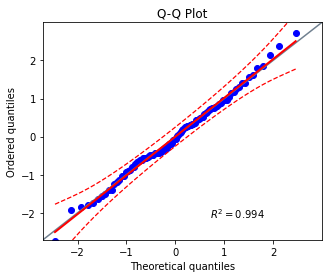

In [6]:
# we will import the python package pingouin to access some of it's exhaustive statistcial functions, but this is  for demo purposes
# qq plot showing 95% condifence interval of the best-fit line.
# This qq plot is comparing our simulated dataset to the theoretical standard normal distribution. 
# This provides a way to assess the "goodness of fit" here as well, by ploting the regression line (the best fit line)
# and providing the coefficient of determinaton to quantify this goodness of fit.
import pingouin as pg
pg.qqplot(normal_random_variables,dist='norm')

The qq plot here is simply plotting the normalized ordered quantiles of the sample (on the y axis) against the theoretical quantiles defined by the standard normal distribution.  Remember that the quantiles of of a dataset can be found using the ppf function in the scipy package, so you can implement your own function to create a simple q-q plot.

Typically you would just call on the builtin function of scipy (stats.probplot) or stats model qqplot (sm.qqplot) to do this for you.

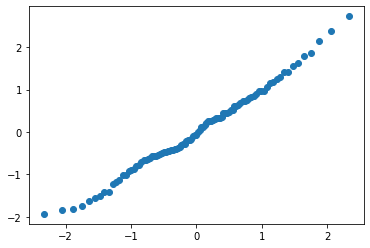

In [8]:
def my_own_qqplot(data,distribution):
    n=len(data)
    z=((data-np.mean(data))/np.std(data))
    quantiles= [distribution.ppf(i/n) for i in range(0,n)]
    plt.plot(quantiles,sorted(z),'o')
    
my_own_qqplot(normal_random_variables,norm)

# Statstical tests of normality

Using qq plots are the best way and most accepted way to judge normality, but the determinations are subjective and take some getting use to. Beside the critical evalutaion of the qq plot, you can also look at the assumption of normality first by running a Shapiro-Wilk test.  This tests if the sample data is well-modelled by a normal distribution and computes how likely it is for a random variable underlying the data set to be normally distributed.

In [9]:
stats.shapiro(normal_random_variables)

ShapiroResult(statistic=0.995180606842041, pvalue=0.97953861951828)

We are looking forward to when we discuss hypotheiss testing, but here the larger than 0.05 p-value means we fail to reject the null hypothesis (that the distribution of the sample is normally distributed) and conclude that the sample is indeed from a normal distribution.  So this p-value (greater than 0.05) means that we support that the level of proof testing the null hypothesis is not unlikely.  Since it is not unlikely, we do not reject the null and therfore do not support the alternative that the popuation does not have a normal distribution. **The p-value greater than 0.05 supports that we fail to reject the null and conclude that it is normal** 